Logit is a classification algorithm. Yes or no based on data. It uses a sigmoid function. It is not a regressor. its a classifier. It does not do well with outliers. It's less prone to over fitting than other classifiers. It's computationally easy to train. Allows you to find the importance of the individual features

# Welcome to Machine Learning.

# "ISBE"  The Motto and Main Steps when building a Machine Learning Model. 
## 1. I - Inspect and explore data.
## 2. S - Select and engineer features.
## 3. B - Build and train model.
## 4. E - Evaluate model.

In [3]:
# Import our libraries 

# Pandas and numpy for data wrangling
import pandas as pd
import numpy as np

# Seaborn / matplotlib for visualization 
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt
%matplotlib inline


# Helper function to split our data
from sklearn.model_selection import train_test_split

# This is our Logit model
from sklearn.linear_model import LogisticRegression

# Helper fuctions to evaluate our model.
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix 

In [9]:
# Load data
df = pd.read_csv('titanic.csv')

# Display data
df.head()

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500


## Data dictionary
<img src='https://miro.medium.com/max/1260/1*rr3UGlpEv_PSMc1pyqa4Uw.png'>


# Inspect and Explore EDA
1. Shape and size
1. Describe
1. Info
1. Check for nulls
1. Check for dupes
1. Plot

In [10]:
# 1. Shape and size
print(df.shape)

(887, 8)


In [11]:
# 2. Describe
df.describe()

,Survived,Pclass,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
count,887.000000,887.000000,887.000000,887.000000,887.000000,887.00000
mean,0.385569,2.305524,29.471443,0.525366,0.383315,32.30542
std,0.487004,0.836662,14.121908,1.104669,0.807466,49.78204
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.00000
25%,0.000000,2.000000,20.250000,0.000000,0.000000,7.92500
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.45420
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.13750
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.32920


In [12]:
# 3. Get info on cols
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887 entries, 0 to 886
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Survived                 887 non-null    int64  
 1   Pclass                   887 non-null    int64  
 2   Name                     887 non-null    object 
 3   Sex                      887 non-null    object 
 4   Age                      887 non-null    float64
 5   Siblings/Spouses Aboard  887 non-null    int64  
 6   Parents/Children Aboard  887 non-null    int64  
 7   Fare                     887 non-null    float64
dtypes: float64(2), int64(4), object(2)
memory usage: 55.6+ KB


## Inspect null values.
* What does this tell us about features we should and should not use. 

In [13]:
# Inspect / check for nulls.
df.isnull().sum() 

Survived                   0
Pclass                     0
Name                       0
Sex                        0
Age                        0
Siblings/Spouses Aboard    0
Parents/Children Aboard    0
Fare                       0
dtype: int64

In [14]:
# Percentage of null values per columns
((df.isnull().sum() / len(df)) * 100).round(2)

Survived                   0.0
Pclass                     0.0
Name                       0.0
Sex                        0.0
Age                        0.0
Siblings/Spouses Aboard    0.0
Parents/Children Aboard    0.0
Fare                       0.0
dtype: float64

## Inspect duplicate rows.
* Phew...

In [15]:
n_dupes = df.duplicated().sum()
print("Number of duplicate rows are %i." % n_dupes)

Number of duplicate rows are 0.


# Visualize our data

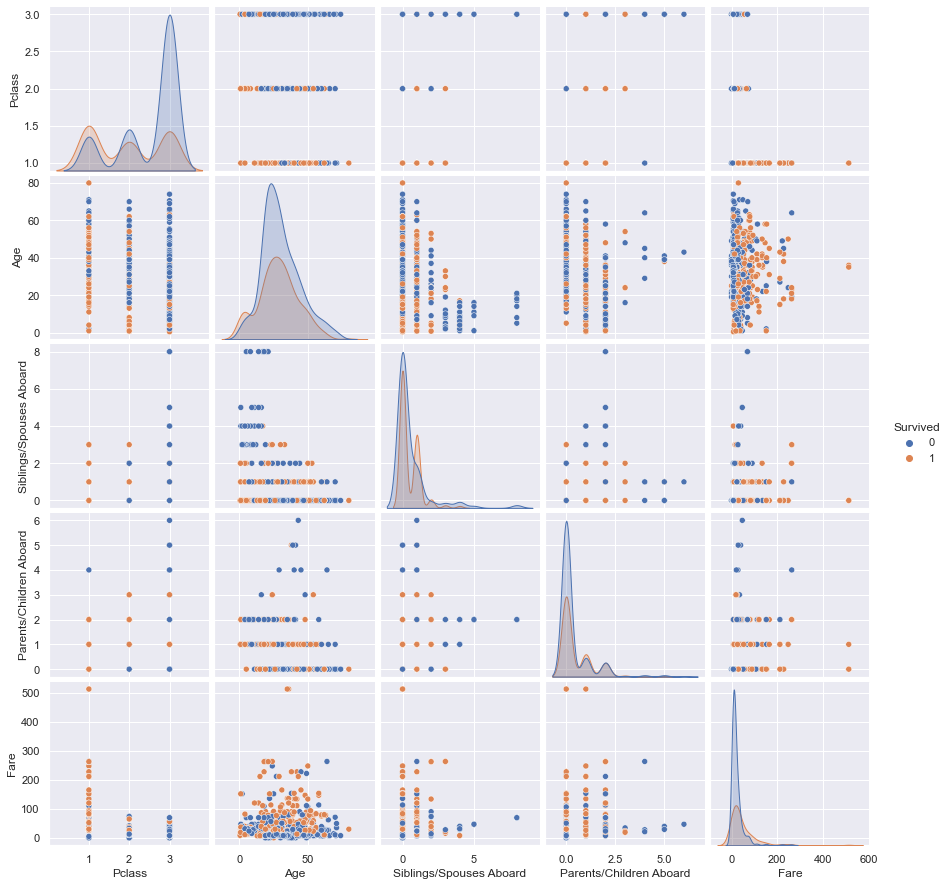

In [17]:
sns.pairplot(df, hue='Survived');

<AxesSubplot:xlabel='age', ylabel='Density'>

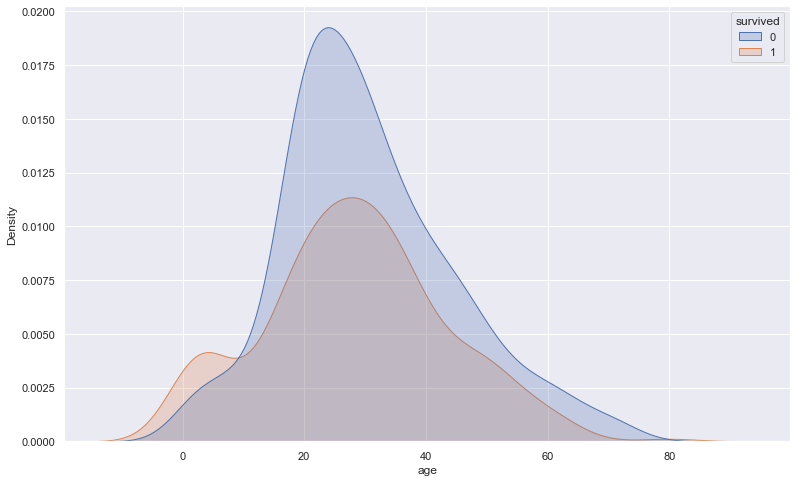

In [10]:
plt.figure(figsize=(13,8))
sns.kdeplot(data=df,x='age', hue='Survived', shade=True)

# "S" Select and Engineer Features
1. Select the features you are going to want to use to predict Survived. 
    * For this first example we are only going to be selecting `Fare, Sex, and Pclass`
    * Don't use features that have nulls in them. 
1. Convert categorical variables into numerical. 
    * Use helper function `pd.get_dummies()` for this 
1. Split into test and train. 

In [12]:
df.head()

,passengerid,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [19]:
df.Survived.value_counts(normalize=True)
# you need to check your class balances to make sure you have enough to  find a pattern, can't be 99% dead

0    0.614431
1    0.385569
Name: Survived, dtype: float64

In [21]:
df.Sex.value_counts()

male      573
female    314
Name: Sex, dtype: int64

In [15]:
df.Pclass.v
alue_counts()

3    491
1    216
2    184
Name: pclass, dtype: int64

### Convert categorical variables into numerical.
* `pd.get_dummies()` is a very helpful function that converts our categorical variables into continuous variables. 

In [29]:
df = pd.get_dummies(df, columns=['Sex', 'Pclass'], drop_first=True)
df.head()

KeyError: "None of [Index(['Sex', 'Pclass'], dtype='object')] are in the [columns]"

In [30]:
selected_features = ['Fare', 'Pclass_2'
                     , 'Pclass_3', 'Sex_male']

# Defining our X and y
### y is what we are trying to predict, and X is what we are using to make that prediction.
* It is industry standard to Name your feature matrix as `X`, and your target variable as `y`


In [32]:
X = df[selected_features]

y = df['Survived']

### Splitting our data into training and testing batches.


In [33]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=45)

print('Lenght of our Training data:', X_train.shape, '\nLength of our Testing data:', X_test.shape)

Lenght of our Training data: (709, 4) 
Length of our Testing data: (178, 4)


# "B" - Build and train our model
* Initalize an empty model
* Train our model using our `model.fit()` with our training data 

In [34]:
from sklearn.linear_model import LogisticRegression

# Initalize our model.  
# This will create an empty untrained Logistic Regression model.
model = LogisticRegression()

print(type(model))


<class 'sklearn.linear_model._logistic.LogisticRegression'>


# This is the heart of our ML process. 
This steps fits (aka trains) our model with our training data.

In [35]:
# !! THIS HAPPENS 'IN PLACE', MEANING IT DOESN'T RETURN ANYTHING !!
model.fit(X_train, y_train)

LogisticRegression()

In [36]:
# Make new predicitions
y_pred = model.predict(X_test)
y_pred

array([1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 0], dtype=int64)

In [37]:
y_pred_proba = model.predict_proba(X_test)[:,1]
y_pred_proba.round(2)

array([0.81, 0.58, 0.1 , 0.25, 0.1 , 0.25, 0.58, 0.92, 0.1 , 0.89, 0.1 ,
       0.1 , 0.38, 0.11, 0.25, 0.41, 0.11, 0.58, 0.1 , 0.1 , 0.25, 0.1 ,
       0.1 , 0.8 , 0.8 , 0.92, 0.1 , 0.58, 0.25, 0.89, 0.1 , 0.58, 0.1 ,
       0.11, 0.81, 0.9 , 0.1 , 0.9 , 0.1 , 0.11, 0.1 , 0.1 , 0.41, 0.1 ,
       0.58, 0.89, 0.59, 0.9 , 0.8 , 0.58, 0.1 , 0.11, 0.58, 0.11, 0.39,
       0.1 , 0.11, 0.58, 0.58, 0.58, 0.11, 0.42, 0.39, 0.25, 0.26, 0.25,
       0.25, 0.25, 0.26, 0.58, 0.25, 0.4 , 0.58, 0.1 , 0.1 , 0.81, 0.1 ,
       0.8 , 0.59, 0.58, 0.39, 0.1 , 0.81, 0.25, 0.58, 0.9 , 0.11, 0.8 ,
       0.25, 0.1 , 0.39, 0.1 , 0.1 , 0.1 , 0.8 , 0.1 , 0.1 , 0.81, 0.4 ,
       0.1 , 0.27, 0.1 , 0.59, 0.1 , 0.1 , 0.39, 0.41, 0.25, 0.39, 0.11,
       0.9 , 0.25, 0.9 , 0.39, 0.1 , 0.58, 0.26, 0.59, 0.59, 0.1 , 0.25,
       0.58, 0.58, 0.1 , 0.8 , 0.25, 0.1 , 0.1 , 0.89, 0.9 , 0.25, 0.59,
       0.25, 0.4 , 0.1 , 0.59, 0.26, 0.59, 0.11, 0.1 , 0.89, 0.1 , 0.39,
       0.1 , 0.4 , 0.1 , 0.9 , 0.4 , 0.81, 0.95, 0.

In [38]:
pred_df = pd.DataFrame.from_dict( {'y_true': y_test, 'y_pred': y_pred, 'probability': y_pred_proba} )
pred_df

,y_true,y_pred,probability
437,1,1,0.807682
67,1,1,0.582286
693,0,0,0.103363
225,1,0,0.252801
665,0,0,0.103363
...,...,...,...
530,1,1,0.588065
286,1,0,0.253581
387,1,1,0.804005
212,0,0,0.253581


# E = Evaluate our model.

# Accuracy, our first look.
Is the percent of predicitions we got correct.
Good for general scoring, but bad in terms of when classes are imbalanced. 

It is the count of all the predictions you got correct divided by the total number of predictions.
Aka, Percent of predictions we got correct.


Accuracy = (TP + TN) / (TP + TN + FP + FN)


In [39]:
# Helper fuctions to evaluate our model. 
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix 

accuracy = accuracy_score(y_test, y_pred)

print("Accuracy Score: %f" % accuracy)

Accuracy Score: 0.792135


# Precision
Out of all the times the MODEL says 'yes' what was the precentage it was correct. 
* The precision is intuitively the ability of the classifier to not label a sample as positive if it is negative. 
* The precision is the ratio tp / (tp + fp) where tp is the number of true positives and fp the number of false positives. 
* If you want to raise precision (ie; only say yes when you are absolutely sure), raise your classification threshold.

In [40]:
precision = precision_score(y_test, y_pred)
print("Precision Score: %f" % precision)
print("In other words, when the model predicts someone Survived, it is correct %f of the time." % precision)

Precision Score: 0.737705
In other words, when the model predicts someone Survived, it is correct 0.737705 of the time.


# Recall
Out of all the times the ACTUAL is 'yes', how many did you get correct.  

Having high recall is important when the cost of missing a True Positive is high.  

For example, if you're detecting cancer.  Saying, you don't have cancer when you really do is really bad. Therefore, if you're building a model to detect cancer, you should optimize for having high recall.  You can do that by lowering your classification threshold. 

* The recall is intuitively the ability of the classifier to find all the positive samples.
* The recall is the ratio tp / (tp + fn) where tp is the number of true positives and fn the number of false negatives. 
* if you want to raise recall, lower your classification threshold

In [41]:
recall = recall_score(y_test, y_pred)
print("Recall Score: %f" % recall)
print("In other words, it correctly identifies %f percent of all survivors" % recall)

Recall Score: 0.681818
In other words, it correctly identifies 0.681818 percent of all survivors


# F1 Score
The ‘harmonic mean’ of precision and recall. 

Good for an overall evaluation metric. 


The F1 score can be interpreted as a weighted average of the precision and recall, where an F1 score reaches its best value at 1 and worst score at 0. 


F1 = 2 * (precision * recall) / (precision + recall)




In [42]:
from sklearn.metrics import f1_score

# F1 Score
f1_score(y_test, y_pred)

0.7086614173228346

* Confustion Matrix
    * True Positive (TP) - When you say yes and actual is yes.
    * False Positive (FP) - When you say yes and actual is no.
    * False Negative (FN) - When you say no and actual is yes.
    * True Negative (TN) - When you say no and actual is no. 

The first term (True or False) is if the prediction was correct or not. True means correct, False means incorrect.
The second term (Positive or Negative) is what the classifier guessed.  Did it say it Yes, or did it say No. 

True Positive (TP): A true positive is an outcome where the model correctly predicts the positive class. When we say YES Survived, actual is YES Survived. Having a high True-Positive rate is GOOD.

True Negative (TN): A true negative is an outcome where the model correctly predicts the negative class.  When we say NO Survived, actual is NO Survived. Having a high true-negative rate is GOOD.

False Negative (FN):  A false negative is an outcome where the model incorrectly predicts the negative class. We say NO Survived, actual is YES Survived.
Having a high False-Negative rate is BAD.

False Positive (FP):  A false positive is an outcome where the model incorrectly predicts the positive class. We say YES Survived, actual is NO Survived.
Having a high False-Positive rate is BAD.




true-negitive: 96 
false-positive: 16 
false-negative: 21 
true-positive: 45


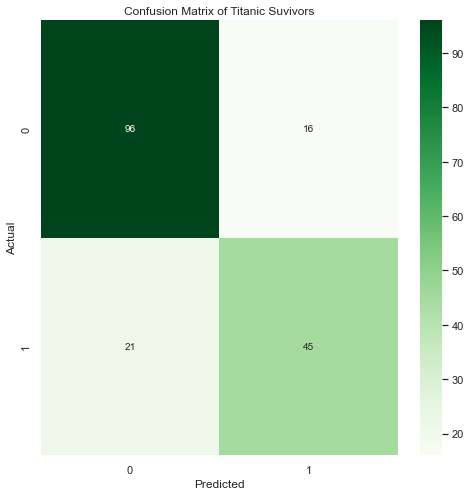

In [43]:

cm = confusion_matrix(y_test, y_pred)

# Just rounding them so the numbers are easier to read
cm = cm.round(2)


tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

fig = plt.figure(figsize=(8,8))
ax = sns.heatmap(cm, annot=True, cmap='Greens', fmt='g')
plt.title("Confusion Matrix of Titanic Suvivors")
plt.xlabel('Predicted')
plt.ylabel('Actual')

print('true-negitive:', tn, 
      '\nfalse-positive:', fp, 
      '\nfalse-negative:', fn, 
      '\ntrue-positive:', tp )

# Now onto the Exercise 